# TODO LIST

Following has to be done prior to 11-02-2021
- 5  Numerical or categorical
- 6  Sanity check
- 7  Five Number Summary
- 8  Box Plot
- 9  Frequency Histogram

 # Imports

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# warnings imported because warnings were getting annoying
import warnings
warnings.filterwarnings('ignore')

# loading the data

In [15]:
# loading the files
file = "C:/Users/Ruben PC/Desktop/FirstYearProject/1st_project/"
accidents = pd.read_csv("data/processed/Road Safety Data - Accidents 2019.csv") 
vehicle = pd.read_csv("data/processed/Road Safety Data - Vehicles 2019.csv")
casualty = pd.read_csv("data/processed/Road Safety Data - Casualties 2019.csv")



# combining the data into one combined dataFrame
result = pd.concat([accidents, vehicle, casualty], axis=1)

# removing duplicate columns
data = result.loc[:,~result.columns.duplicated()]
sheffield = (result["Local_Authority_(District)"] == 215)
data = data[sheffield]

# Dimensions of the data
Report the dimensions of the data (number of tables, rows, fields)

In [16]:
# Dimensions of the data
print("There is a 3 tables:")
print("Dimensions of file named:\t accidents:\t ", accidents.shape)
print("Dimensions of file named:\t vehicles:\t ", vehicle.shape)
print("Dimensions of file named:\t casualties:\t ", casualty.shape)
print("Dimensions of all files combined: ", data.shape)

There is a 3 tables:
Dimensions of file named:	 accidents:	  (117536, 32)
Dimensions of file named:	 vehicles:	  (216381, 23)
Dimensions of file named:	 casualties:	  (153158, 16)
Dimensions of all files combined:  (909, 68)


# Numerical or categorical

In [17]:
# TODO
#list(data.columns)

# Sanity check

In [18]:
# TODO

# Five Number Summary

In [34]:
mask_age = (vehicle['Age_of_Driver']>=0)
sheffield_agecleaned_vehicle = accidents["Number_of_Vehicles"][mask_age]

Q2v = np.quantile(sheffield_agecleaned_vehicle, .50)
Q1v = np.quantile(sheffield_agecleaned_vehicle, .25)
Q3v = np.quantile(sheffield_agecleaned_vehicle, .75)
vehiclemin = min(sheffield_agecleaned_vehicle)
vehiclemax = max(sheffield_agecleaned_vehicle)

fivenumbersummary_v = [vehiclemin, Q1v, Q2v, Q3v, vehiclemax]
fivenumbersummary_v

[1, 1.0, 2.0, 2.0, 17]

In [31]:
#AGE OF DRIVER
mask_age = (vehicle['Age_of_Driver']>=18)
sheffield_agecleaned = vehicle["Age_of_Driver"][mask_age]

Q2 = np.quantile(sheffield_agecleaned, .50)
Q1 = np.quantile(sheffield_agecleaned, .25)
Q3 = np.quantile(sheffield_agecleaned, .75)
agemin = min(sheffield_agecleaned)
agemax = max(sheffield_agecleaned)

fivenumbersummary = [agemin, Q1, Q2, Q3, agemax]
print("Fivenumber summary for the Age of driver:", fivenumbersummary)



#AGE OF MALE AND FEMALE DRIVERS
mask_male = (vehicle['Sex_of_Driver']==1)
mask_female = (vehicle['Sex_of_Driver']==2)

sheffield_age_male= sheffield_agecleaned[mask_male]
sheffield_age_female= sheffield_agecleaned[mask_female]

Q2m = np.quantile(sheffield_age_male, .50)
Q1m = np.quantile(sheffield_age_male, .25)
Q3m = np.quantile(sheffield_age_male, .75)
ageminm = min(sheffield_age_male)
agemaxm = max(sheffield_age_male)

Q2f = np.quantile(sheffield_age_female, .50)
Q1f = np.quantile(sheffield_age_female, .25)
Q3f = np.quantile(sheffield_age_female, .75)
ageminf = min(sheffield_age_female)
agemaxf = max(sheffield_age_female)

fivenumbersummary_m = [ageminm, Q1m, Q2m, Q3m, agemaxm]
fivenumbersummary_f = [ageminf, Q1f, Q2f, Q3f, agemaxf]

print("Fivenumber summary for the Age of female drivers", fivenumbersummary_f)
print("Fivenumber summary for the Age of male drivers", fivenumbersummary_m);



#AGE OD CASUALTY
mask_age2 = (casualty['Age_of_Casualty']>=0)
sheffield_agecleaned_Age_of_Casualty = casualty["Age_of_Casualty"][mask_age2]

Q2c = np.quantile(sheffield_agecleaned_Age_of_Casualty, .50)
Q1c = np.quantile(sheffield_agecleaned_Age_of_Casualty, .25)
Q3c = np.quantile(sheffield_agecleaned_Age_of_Casualty, .75)
c_age_min = min(sheffield_agecleaned_Age_of_Casualty)
c_age_max = max(sheffield_agecleaned_Age_of_Casualty)

fivenumbersummary_c = [c_age_min, Q1c, Q2c, Q3c, c_age_max]
print("Fivenumber summary for the Age of casualty:", fivenumbersummary_c)

Fivenumber summary for the Age of driver: [18, 29.0, 39.0, 52.0, 102]
Fivenumber summary for the Age of female drivers [18, 28.0, 39.0, 52.0, 101]
Fivenumber summary for the Age of male drivers [18, 29.0, 39.0, 53.0, 102]
Fivenumber summary for the Age of casualty: [0, 23.0, 34.0, 51.0, 102]


# Box Plot

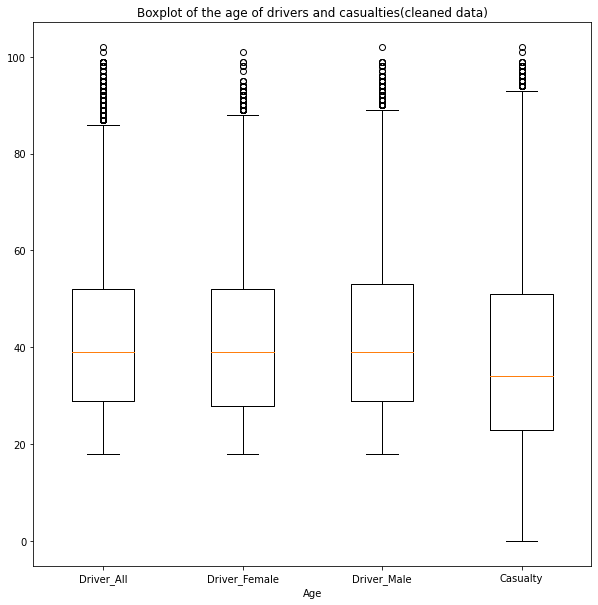

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
Ages=[sheffield_agecleaned, sheffield_age_female, sheffield_age_male, sheffield_agecleaned_Age_of_Casualty]
ax.boxplot(Ages)

plt.xticks([1, 2, 3, 4],['Driver_All', 'Driver_Female', 'Driver_Male', 'Casualty'])
ax.set_title('Boxplot of the age of drivers and casualties(cleaned data)');
ax.set_xlabel('Age');

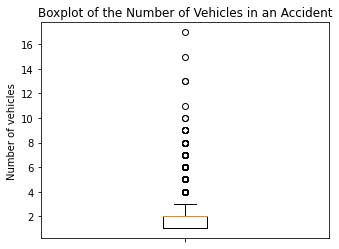

In [35]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) 
axes.boxplot(sheffield_agecleaned_vehicle);

axes.set_ylabel('Number of vehicles')
axes.set_xticklabels('')
axes.set_title('Boxplot of the Number of Vehicles in an Accident');

# Frequency Histogram
Report a frequency histogram for all numerical variables, and a frequency bar plot for all categorical variables (where this makes sense)
 

In [105]:
list(accidents.columns)

['Accident_Index',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'LSOA_of_Accident_Location']

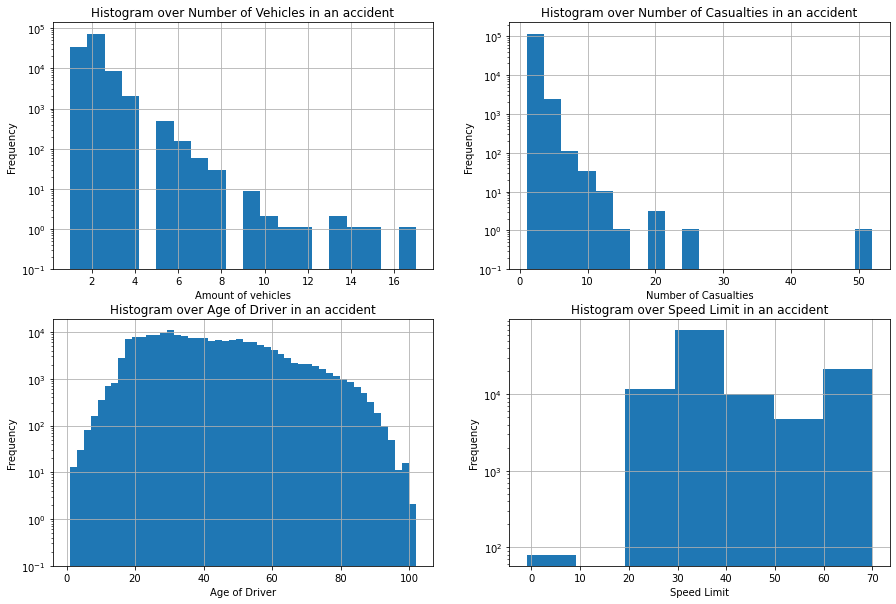

In [107]:
# TODO
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
mask = (vehicle["Age_of_Driver"] >=0)
accidents["Number_of_Vehicles"].  hist(ax=ax[0,0], bins=20, bottom=0.1)
accidents["Speed_limit"].         hist(ax=ax[1,1], bins=7);
accidents["Number_of_Casualties"].hist(ax=ax[0,1], bins=20, bottom=0.1)
vehicle  ["Age_of_Driver"][mask]       .hist(ax=ax[1,0], bins=50, bottom=0.1)

ax[0,0].set_title('Histogram over Number of Vehicles in an accident')
ax[1,1].set_title('Histogram over Speed Limit in an accident')
ax[0,1].set_title('Histogram over Number of Casualties in an accident')
ax[1,0].set_title('Histogram over Age of Driver in an accident')
ax[0,0].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('Frequency')
ax[1,1].set_ylabel('Frequency')
ax[0,0].set_xlabel('Amount of vehicles')
ax[1,1].set_xlabel('Speed Limit')
ax[0,1].set_xlabel('Number of Casualties')
ax[1,0].set_xlabel('Age of Driver')
ax[0,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
